# The influence of audience quantity superiority on Israeli football league matches final results
#### By: Nimrod Baram

<br>
<br>

### 1. Introduction

In football, similar to every competitive sports, hosting is often considered as advantage, whether the host is a nation, a city, or even a different ground in the same neighborhood. There are several factors behind this conception, like the host athletes familiarity with the contest ground, or sometimes the long journey the guest athletes have to pass, but the most important factor is regarded as the local audience support, which can encourage the host, discourage the guest and can even effect the referees decision in favor of the host.
<br>
I can guess that in the majority of football leagues over the world, the host team (which can also be called the **home team**) enjoys the support of explicit larger quantity of audience compare to the guest team (which can also be called the __away team__). However, in case of the Israeli major football league, this statement isn't quite accurate, because a match in which the away audience exceeds the home audience in quantity isn't rare, and then the away team actually wins the most critical advantage of hosting.
<br>
Therefore, I assume that audience quantity superiority effects of the matches final results more than hosting only. In this project I would like to compare the host advantage against the audience quantity superiority according to the matches final results, in the Israeli major football league during the last seasons, and find out if there are significant differences between them.

<br>

### 2. Analysis
#### 2.1 Data acquisition

All data of home and away attendance of every single match has been collected from the [Israeli proffesional football leagues site](https://www.football.co.il/) and the [Israeli proffesional football leagues facebook web page](https://www.facebook.com/IsraelProFootball), likewise the final result of every single match.
<br>
Since the exact audience quantities have been published starting from 2016-2017 season only, all data refers to matches between the first matchday of this season (in August 2016) and the last matchday before the corona virus restrictions in Israel (in March 2020).
<br>
Additionally, for more thorough research (see entry section 2.4), the league final tables of these relevant seasons has been collected from the [Israel football association site](https://www.football.org.il/).

#### 2.2 Data inspecting, initial analysis and data tidying 

First, let's take a look at the data through pandas data frame in python code:

In [1]:
import pandas as pd
import numpy as np

matches=pd.read_csv('matches.csv')
print(matches)

        season  matchday             home team            away team  \
0    2016-2017         1  bnei yehuda tel aviv         bnei sakhnin   
1    2016-2017         1       hapoel ashqelon         hapoel haifa   
2    2016-2017         1   ironi kiryat shmona            ashdod fc   
3    2016-2017         1     hapoel beer sheva       hapoel raanana   
4    2016-2017         1   maccabi petah tikva     beitar jerusalem   
..         ...       ...                   ...                  ...   
897  2019-2020        26       hapoel tel aviv        hapoel hadera   
898  2019-2020        26  bnei yehuda tel aviv         hapoel haifa   
899  2019-2020        26     sektzia nes ziona  ironi kiryat shmona   
900  2019-2020        26      beitar jerusalem            ashdod fc   
901  2019-2020        26         maccabi haifa    hapoel beer sheva   

     home attendance  away attendance  total attendance winning team  
0               2070              154              2224            D  
1    

We can understand from this data frame that each row in it refers to single match and includes the match details like the season, matchday, home and away teams, home and away attendences and total, and the match result under the column 'winning team', in which 'H' means the home team had won the match, 'A' means the away team had won, and 'D' means draw. There are in total 902 rows in the data frame.
<br>
Now we'll check if there are null values in the data frame columns:

In [2]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   season            902 non-null    object
 1   matchday          902 non-null    int64 
 2   home team         902 non-null    object
 3   away team         902 non-null    object
 4   home attendance   902 non-null    int64 
 5   away attendance   902 non-null    int64 
 6   total attendance  902 non-null    int64 
 7   winning team      902 non-null    object
dtypes: int64(4), object(4)
memory usage: 56.5+ KB


Since there are no null values, let's take a glimpse at the final results proportions of all matches, before the data tidying, for initial analysis:

In [5]:
#Matches final results proportions
matches['winning team'].value_counts(normalize=True)

H    0.384701
A    0.344789
D    0.270510
Name: winning team, dtype: float64

We can see that there are more home wins than away wins, but the difference may not seem very significant.
<br>
Before we'll figure this out, I'll tidy the data. First, if we'll inspect the first rows we can easily notice that there are matches with total attendance equals to 0:

In [6]:
#Inspect the first 20 rows of the data frame
matches.head(20)

,season,matchday,home team,away team,home attendance,away attendance,total attendance,winning team
0,2016-2017,1,bnei yehuda tel aviv,bnei sakhnin,2070,154,2224,D
1,2016-2017,1,hapoel ashqelon,hapoel haifa,1997,247,2244,H
2,2016-2017,1,ironi kiryat shmona,ashdod fc,900,30,930,H
3,2016-2017,1,hapoel beer sheva,hapoel raanana,12350,50,12400,H
4,2016-2017,1,maccabi petah tikva,beitar jerusalem,1500,4500,6000,D
5,2016-2017,1,maccabi tel aviv,hapoel kfar sava,6066,286,6352,H
6,2016-2017,1,maccabi haifa,hapoel tel aviv,24854,2900,27754,H
7,2016-2017,2,hapoel haifa,bnei yehuda tel aviv,0,0,0,H
8,2016-2017,2,ashdod fc,maccabi tel aviv,0,0,0,A
9,2016-2017,2,bnei sakhnin,maccabi haifa,0,0,0,H


This totals can be derived from lack of attendance information (more common reason) and also from audience entrance prohibition (rare). Whatever the reason is, I would like to remove these matches from the data frame because we can't tell about them which one of both teams has audience quantity superiority, and therefore they are not appropriate to the project main question.

In [7]:
#Removing rows where the total attendance equals to 0
matches=matches.drop(matches[matches['total attendance']==0].index).reset_index(drop=True)

#Now we'll take another look at the first 20 rows
matches.head(20)

,season,matchday,home team,away team,home attendance,away attendance,total attendance,winning team
0,2016-2017,1,bnei yehuda tel aviv,bnei sakhnin,2070,154,2224,D
1,2016-2017,1,hapoel ashqelon,hapoel haifa,1997,247,2244,H
2,2016-2017,1,ironi kiryat shmona,ashdod fc,900,30,930,H
3,2016-2017,1,hapoel beer sheva,hapoel raanana,12350,50,12400,H
4,2016-2017,1,maccabi petah tikva,beitar jerusalem,1500,4500,6000,D
5,2016-2017,1,maccabi tel aviv,hapoel kfar sava,6066,286,6352,H
6,2016-2017,1,maccabi haifa,hapoel tel aviv,24854,2900,27754,H
7,2016-2017,3,ironi kiryat shmona,hapoel raanana,1020,50,1070,D
8,2016-2017,3,bnei yehuda tel aviv,maccabi haifa,2300,4700,7000,D
9,2016-2017,3,hapoel haifa,hapoel kfar sava,2268,232,2500,A


And when we look at the tidy data frame we can see that it has now 787 rows:

In [8]:
#Watch the data frame shape (number of rows, number of columns)
matches.shape

(787, 8)

But the tidying isn't over yet. As I've mentioned before, I am focusing on matches with home or away audience quantity superiority. Except the rare cases where the home attendance is equal to the away attendance, I would also like to define what is **significant quantity superiority**, because, for example, a match with home attendance of 1000 and away attendance of 980 doesn't seem to have significant superiority to the home team.
<br>
Therefore, I've decided arbitrary what will be considered as significant superiority by these criteria:
<br>
* If the total attendance is up to 1000 (not included), a significant superiority will be determined if the home/away or away/home ratio is greater than or equal to 1.5.
<br>
* If the total attendance is up to 2000 (not included), a significant superiority will be determined if the home/away or away/home ratio is greater than or equal to 1.3333 (4/3).
<br>
* If the total attendance is greater than or equal to 2000, a significant superiority will be determined if the home/away or away/home ratio is greater than or equal to 1.2.
<br>
* In the rare cases in which only the home team or away team had attendance equals to 0 for some reason (i.e 0 in the ratio denominator), significant superiority will be determined to the side that has audience.

I've applied this method by creating an appropriate function:

In [9]:
#Defining the significant superiority determinative function
def homeaway_superior(df_row):
    #If home or away attendance equals to 0
    if df_row['away attendance']==0:
        return 'home superiority'
    elif df_row['home attendance']==0:
        return 'away superiority'
    #If total attendance up to 1000
    elif df_row['total attendance']<1000:
        if df_row['home attendance']/df_row['away attendance'] >= 1.5:
            return 'home superiority'
        elif df_row['away attendance']/df_row['home attendance'] >=1.5:
            return 'away superiority'
        else:
            return 'no superiority'
    #If total attendance up to 2000
    elif df_row['total attendance']<2000:
        if df_row['home attendance']/df_row['away attendance'] >= 4.0/3:
            return 'home superiority'
        elif df_row['away attendance']/df_row['home attendance'] >=4.0/3:
            return 'away superiority'
        else:
            return 'no superiority'
    #If total attendance greater than or equal to 2000
    else:
        if df_row['home attendance']/df_row['away attendance'] >= 1.2:
            return 'home superiority'
        elif df_row['away attendance']/df_row['home attendance'] >=1.2:
            return 'away superiority'
        else:
            return 'no superiority'
        

#Apllying the function on the data frame and inserting the function output into a new column:
matches.loc[:,'home/away superiority']=matches.apply(homeaway_superior,axis=1)

We should notice that if neither of the criteria conditions is true, the row value for this new column will be 'no superiority'.
<br>
Now let's take another look at the updated data frame:

In [10]:
matches

,season,matchday,home team,away team,home attendance,away attendance,total attendance,winning team,home/away superiority
0,2016-2017,1,bnei yehuda tel aviv,bnei sakhnin,2070,154,2224,D,home superiority
1,2016-2017,1,hapoel ashqelon,hapoel haifa,1997,247,2244,H,home superiority
2,2016-2017,1,ironi kiryat shmona,ashdod fc,900,30,930,H,home superiority
3,2016-2017,1,hapoel beer sheva,hapoel raanana,12350,50,12400,H,home superiority
4,2016-2017,1,maccabi petah tikva,beitar jerusalem,1500,4500,6000,D,away superiority
...,...,...,...,...,...,...,...,...,...
782,2019-2020,26,hapoel tel aviv,hapoel hadera,9802,471,10273,H,home superiority
783,2019-2020,26,bnei yehuda tel aviv,hapoel haifa,1864,1119,2983,D,home superiority
784,2019-2020,26,sektzia nes ziona,ironi kiryat shmona,249,136,385,H,home superiority
785,2019-2020,26,beitar jerusalem,ashdod fc,4770,73,4843,H,home superiority


In the next step I'll remove every row that has 'no superiority' value in the 'home/away superiority' column, because I care only for the significant superiority.

In [11]:
#Removing rows where there are no significant superiority
matches=matches.drop(matches[matches['home/away superiority']=='no superiority'].index).reset_index(drop=True)

The updated data frame has now 745 rows:

In [12]:
#Watch again the data frame shape (number of rows, number of columns)
matches.shape

(745, 9)

Now let's take again a look at the final results proportions when there is an audience superiority in every match:

In [14]:
#Updated matches final results proportions
matches['winning team'].value_counts(normalize=True)

H    0.393289
A    0.334228
D    0.272483
Name: winning team, dtype: float64

The final results distribution hasn't changed so much compare to the distribution before the tidying.
<br>
<br>
Finally, I would like to create a new data frame that includes only the matches where one of the teams had won (i.e no draws). In this case I won't update the current data frame.

In [15]:
no_draws_matches=matches[matches['winning team'] != 'D'].reset_index(drop=True)

no_draws_matches

,season,matchday,home team,away team,home attendance,away attendance,total attendance,winning team,home/away superiority
0,2016-2017,1,hapoel ashqelon,hapoel haifa,1997,247,2244,H,home superiority
1,2016-2017,1,ironi kiryat shmona,ashdod fc,900,30,930,H,home superiority
2,2016-2017,1,hapoel beer sheva,hapoel raanana,12350,50,12400,H,home superiority
3,2016-2017,1,maccabi tel aviv,hapoel kfar sava,6066,286,6352,H,home superiority
4,2016-2017,1,maccabi haifa,hapoel tel aviv,24854,2900,27754,H,home superiority
...,...,...,...,...,...,...,...,...,...
537,2019-2020,26,maccabi netanya,maccabi tel aviv,2520,4083,6603,A,away superiority
538,2019-2020,26,hapoel tel aviv,hapoel hadera,9802,471,10273,H,home superiority
539,2019-2020,26,sektzia nes ziona,ironi kiryat shmona,249,136,385,H,home superiority
540,2019-2020,26,beitar jerusalem,ashdod fc,4770,73,4843,H,home superiority


We've left with a new data frame that has 542 rows. This data frame will be used for the next steps.

#### 2.3 First comparison of hypothesis testings

**Note:** In this section we are going to assume that a **neutral match** result (neutral match- without host and guest and without audience superiority to either of team) is **independent**, i.e **each team has the same probability to win the match**.

Now I am going to answer the project main question by statistical tests.
<br>
<br>
**Hosting advantage test-**
<br>
Given that a match ended with one of the teams win, the **null hypothesis** of the first test is that hosting doesn't effect the home team probability to win, so the probability remains 50% (p=0.5). On the other hand, the **alternative hypothesis** of the first test is that hosting **increases** the home team probability to win so it's over 50% (p>0.5).
<br>
Before starting the test, I will define **significance threshold of 5%** (alpha=0.05). As the significance threshold decreases, so decreases the possibility to reject the null hypothesis, but if the test result determines that the null hypothesis is rejected, smaller significance threshold increases the possibility that the rejection is correct. For the current significance threshold, if the test output is rejection of the null hypothesis, we would have 95% (1-alpha) confidence that the test result is true and therefore the alternative hypothesis is correct.

We'll take a look at the new data frame wins distribution:

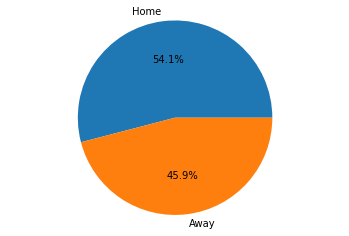

In [16]:
from matplotlib import pyplot as plt

home_wins=no_draws_matches['winning team'][no_draws_matches['winning team']=='H'].count()
away_wins=no_draws_matches['winning team'][no_draws_matches['winning team']=='A'].count()
total_wins=no_draws_matches['winning team'].count()

#Plotting the chart
plt.pie([home_wins,away_wins],labels=['Home','Away'],autopct='%0.1f%%')
plt.axis('equal')
plt.show()

We can learn from the chart that for this data, there are more than 8% of home wins comparing to away wins. This difference seems significant, but after all, this data is a sample of 4 seasons, when there are dozens of seasons all over the Israeli football league history, so we can't necessarily infer that the real difference is significant.
<br>
Nevertheless, we can know (with 95% confidence) whether to reject the null hypothesis (i.e significant difference) or not reject (i.e not significant difference) when we have one sample only, by using **binomial test**.

I've decided to use binomial test because we have one sample of the whole data, and the 'winning team' is a binary categorical variable (binary- given no matches ended with a draw), so we can consider the home win as **'success'** (with probability of p) and the away win as **'failure'** (with probability of 1-p), just the same as in binomial variable.

The python binomial test returns value that is called **p-value**. The test criterion is quite simple- if the p-value is smaller than or equals to the predefined significance threshold, we can reject the null hypothesis, else (p-value is greater) we can't reject the null hypothesis for this significance threshold.
<br>
Now let's do the test according to our data and get the test result:

In [17]:
from scipy.stats import binom_test

#Defining the significance threshold
alpha=0.05

#Doing the test
p_val_test1=binom_test(home_wins,total_wins,0.5,alternative='greater')

print(f'P-value equals to {p_val_test1}')

#printing the test result
if p_val_test1 <= alpha:
    print('Null hypothesis can be rejected')
else:
    print('Null hypothesis cannot be rejected')

P-value equals to 0.03232331296049395
Null hypothesis can be rejected


So we can say by this test, with 95% confidence, that **the alternative hypothesis is correct** and hosting indeed increases the home team probability to win.
<br>
<br>

**Audience quantity superiority test-**
<br>
Given again that a match ended with one of the teams win, the **null hypothesis** of the second test is that audience quantity superiority for one team doesn't effect this team probability to win, so the probability remains 50% (p=0.5). On the other hand, the **alternative hypothesis** of the second test is that audience quantity superiority **increases** this team probability to win so it's over 50% (p>0.5).
<br>
Once again, I'll define for this test **significance threshold of 5%**.

Now I'll create a new winning team column according the new home/away win criteria for the current test:
<br>
* If the away team has audience quantity superiority and it had won the match, this win will be counted as 'Home'.
<br>
* If the away team has audience quantity superiority and the home team had won the match, this win will be counted as 'Away'.

In [18]:
#Creating new column of winning team after the definition changing
no_draws_matches['new definition winning team']=no_draws_matches['winning team']

#Updating the new column according to the new criteria
no_draws_matches.loc[(no_draws_matches['new definition winning team']=='A') & (no_draws_matches['home/away superiority']=='away superiority'),['new definition winning team']]='Home'
no_draws_matches.loc[(no_draws_matches['new definition winning team']=='H') & (no_draws_matches['home/away superiority']=='away superiority'),['new definition winning team']]='Away'
no_draws_matches.loc[(no_draws_matches['new definition winning team']=='H') & (no_draws_matches['home/away superiority']=='home superiority'),['new definition winning team']]='Home'
no_draws_matches.loc[(no_draws_matches['new definition winning team']=='A') & (no_draws_matches['home/away superiority']=='home superiority'),['new definition winning team']]='Away'

no_draws_matches

,season,matchday,home team,away team,home attendance,away attendance,total attendance,winning team,home/away superiority,new definition winning team
0,2016-2017,1,hapoel ashqelon,hapoel haifa,1997,247,2244,H,home superiority,Home
1,2016-2017,1,ironi kiryat shmona,ashdod fc,900,30,930,H,home superiority,Home
2,2016-2017,1,hapoel beer sheva,hapoel raanana,12350,50,12400,H,home superiority,Home
3,2016-2017,1,maccabi tel aviv,hapoel kfar sava,6066,286,6352,H,home superiority,Home
4,2016-2017,1,maccabi haifa,hapoel tel aviv,24854,2900,27754,H,home superiority,Home
...,...,...,...,...,...,...,...,...,...,...
537,2019-2020,26,maccabi netanya,maccabi tel aviv,2520,4083,6603,A,away superiority,Home
538,2019-2020,26,hapoel tel aviv,hapoel hadera,9802,471,10273,H,home superiority,Home
539,2019-2020,26,sektzia nes ziona,ironi kiryat shmona,249,136,385,H,home superiority,Home
540,2019-2020,26,beitar jerusalem,ashdod fc,4770,73,4843,H,home superiority,Home


So now we have the new column 'new definition winning team' which shows 'Home' if the team with the audience quantity superiority had won and 'Away' if the team with the audience quantity inferiority had won.
<br>
Let's take a look at the first 20 rows of the new data frame for example:

In [20]:
no_draws_matches.head(20)

,season,matchday,home team,away team,home attendance,away attendance,total attendance,winning team,home/away superiority,new definition winning team
0,2016-2017,1,hapoel ashqelon,hapoel haifa,1997,247,2244,H,home superiority,Home
1,2016-2017,1,ironi kiryat shmona,ashdod fc,900,30,930,H,home superiority,Home
2,2016-2017,1,hapoel beer sheva,hapoel raanana,12350,50,12400,H,home superiority,Home
3,2016-2017,1,maccabi tel aviv,hapoel kfar sava,6066,286,6352,H,home superiority,Home
4,2016-2017,1,maccabi haifa,hapoel tel aviv,24854,2900,27754,H,home superiority,Home
5,2016-2017,3,hapoel haifa,hapoel kfar sava,2268,232,2500,A,home superiority,Away
6,2016-2017,3,hapoel beer sheva,bnei sakhnin,15000,420,15420,H,home superiority,Home
7,2016-2017,3,maccabi petah tikva,hapoel tel aviv,800,1700,2500,H,away superiority,Away
8,2016-2017,4,ashdod fc,hapoel haifa,750,80,830,A,home superiority,Away
9,2016-2017,4,hapoel kfar sava,bnei yehuda tel aviv,1276,452,1728,A,home superiority,Away


We can see on line 8 (index #7) and line 16 (index #15) that although the hosts had won, according to 'winning team' column, the win has been counted as away win in the 'new definition winning team' column because the away team had audience quantity superiority. Likewise, in line 13 (index #12) we can see the opposite case where the guest had won but the win has been counted as home win in the new column, for the same reason.

We'll take a look at the new data frame wins distribution:

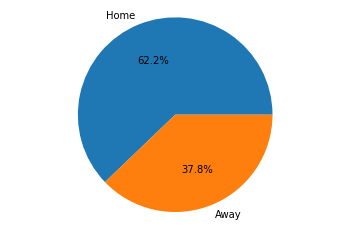

In [21]:
updated_home_wins=no_draws_matches['new definition winning team'][no_draws_matches['new definition winning team']=='Home'].count()
updated_away_wins=no_draws_matches['new definition winning team'][no_draws_matches['new definition winning team']=='Away'].count()

#Plotting the chart
plt.clf()
plt.pie([updated_home_wins,updated_away_wins],labels=['Home','Away'],autopct='%0.1f%%')
plt.axis('equal')
plt.show()

According to the new definition, there are more than 24% of home wins comparing to away wins. This difference seems very significant, but it's still based on one sample, so we're going to have another **binomial test**:

In [22]:
#Doing the test
p_val_test2=binom_test(updated_home_wins,total_wins,0.5,alternative='greater')

print(f'P-value equals to {p_val_test2}')

#printing the test result
if p_val_test2 <= alpha:
    print('Null hypothesis can be rejected')
else:
    print('Null hypothesis cannot be rejected')

P-value equals to 7.836164796983154e-09
Null hypothesis can be rejected


So we can say by this test, with 95% confidence, that **the alternative hypothesis is correct** and audience quantity superiority indeed increases the team probability to win, whether it's the home or away team.

**Comparing the two tests results-**
<br>
Both tests results had rejected their null hypothesis, but there is an explicit difference between both tests p-values. While the p-value of the first test equals to more than 0.03, so its null hypothesis may not be rejected for smaller significance thresholds, the p-value of the second test is so minimal that we can reject its null hypothesis with 100% confidence.
<br>
Therefore, under the mentioned independency assumption, we can infer that both hosting and audience quantity superiority effect the match final result in favor of the host and the superior audience team respectively, but **the audience quantity superiority is more effective factor than hosting**, as I've expected.

#### 2.4 Second comparison of hypothesis testings

**Creating real independent data-**
<br>
During the previous section, we had assumed that a neutral match result is independent, but in reality it's not true for most of cases. There are many factors that can increase and decrease one team probablity to win a match, but apparently the most crucial factor is the **quality difference between two teams**.
<br>
The teams rankings in the league season final table is a good measure for their quality. For example, the league champion (team ranked 1st in the season final table) has good chance to win the team ranked 14th place (last in the season final table) in a single match, whether the last one is hosting the match or has audience quantity superiority, because the champion is much better team.
<br>
Moreover, the high ranked teams have often greater audience attendance- home and away- than the middle and low ranked teams, and also these high ranked teams are often wealthier and can easily have more quality team than others. Therefore, there may be a positive correlation between the quality difference and the audience quantity difference of two teams, and it may have significant effect on the previous section results.
<br>
Although I assume that there is a positive correlation, I won't try calculate it during this project. Instead, I will create more **independent data** by filtering the matches that have significant quality difference, based on the teams ranking, and then **repeat the previous section statistical tests on this data**.

For this purpose, I will use the final tables data frame. Let's take a look at it:

In [23]:
final_tables=pd.read_csv('final_tables.csv')

print(final_tables)

       season                  team  rank
0   2016-2017     hapoel beer sheva     1
1   2016-2017      maccabi tel aviv     2
2   2016-2017      beitar jerusalem     3
3   2016-2017   maccabi petah tikva     4
4   2016-2017          bnei sakhnin     5
5   2016-2017         maccabi haifa     6
6   2016-2017   ironi kiryat shmona     7
7   2016-2017       hapoel tel aviv     8
8   2016-2017          hapoel haifa     9
9   2016-2017             ashdod fc    10
10  2016-2017        hapoel raanana    11
11  2016-2017  bnei yehuda tel aviv    12
12  2016-2017       hapoel ashqelon    13
13  2016-2017      hapoel kfar sava    14
14  2017-2018     hapoel beer sheva     1
15  2017-2018      maccabi tel aviv     2
16  2017-2018      beitar jerusalem     3
17  2017-2018          hapoel haifa     4
18  2017-2018       maccabi netanya     5
19  2017-2018  bnei yehuda tel aviv     6
20  2017-2018   ironi kiryat shmona     7
21  2017-2018   maccabi petah tikva     8
22  2017-2018        hapoel raanan

The 'final_tables' data frame includes the league final tables during the relevant seasons, with every team rankings over these seasons. 
<br>
**Note:** the 2019-2020 season table is up to 26th matchday, before the corona virus restrictions in Israel.

In the next step, I would like to add a home team ranking, away team ranking and ranking difference **(in absolute value)** columns to the matches data frame, corresponding to the season, the home team and the away team, by creating an appropriate function that will connect between both matches and final tables data frames.

In [24]:
#Defining variables for loops
seasons=final_tables.season.unique()
teams=final_tables.team.unique()

#Creating the home team ranking function
def home_rank(data_frame_row):
    for seasn in seasons:
        for team in teams:
            if data_frame_row['season']==seasn and data_frame_row['home team']==team:
                return int(final_tables['rank'][(final_tables['season']==seasn) & (final_tables['team']==team)])
            

#Creating the away team ranking function
def away_rank(data_frame_row):
    for seasn in seasons:
        for team in teams:
            if data_frame_row['season']==seasn and data_frame_row['away team']==team:
                return int(final_tables['rank'][(final_tables['season']==seasn) & (final_tables['team']==team)])
            

#Applying the functions on no_draws_matches data frame and creating the new columns
no_draws_matches.loc[:,'home team rank']=no_draws_matches.apply(home_rank,axis=1)
no_draws_matches.loc[:,'away team rank']=no_draws_matches.apply(away_rank,axis=1)
no_draws_matches['rank difference']=np.abs(no_draws_matches['home team rank']-no_draws_matches['away team rank'])

no_draws_matches

,season,matchday,home team,away team,home attendance,away attendance,total attendance,winning team,home/away superiority,new definition winning team,home team rank,away team rank,rank difference
0,2016-2017,1,hapoel ashqelon,hapoel haifa,1997,247,2244,H,home superiority,Home,13,9,4
1,2016-2017,1,ironi kiryat shmona,ashdod fc,900,30,930,H,home superiority,Home,7,10,3
2,2016-2017,1,hapoel beer sheva,hapoel raanana,12350,50,12400,H,home superiority,Home,1,11,10
3,2016-2017,1,maccabi tel aviv,hapoel kfar sava,6066,286,6352,H,home superiority,Home,2,14,12
4,2016-2017,1,maccabi haifa,hapoel tel aviv,24854,2900,27754,H,home superiority,Home,6,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2019-2020,26,maccabi netanya,maccabi tel aviv,2520,4083,6603,A,away superiority,Home,9,1,8
538,2019-2020,26,hapoel tel aviv,hapoel hadera,9802,471,10273,H,home superiority,Home,5,8,3
539,2019-2020,26,sektzia nes ziona,ironi kiryat shmona,249,136,385,H,home superiority,Home,13,12,1
540,2019-2020,26,beitar jerusalem,ashdod fc,4770,73,4843,H,home superiority,Home,3,10,7


Now I would like to define **significant quality difference** as absolute valued ranking difference greater than or equals to 4. If there is significant quality difference in the match, this match result is dependent.

**Note:** from now on, we are going to assume that a **neutral match** result (neutral match- without host and guest, without audience superiority to either team and **without significant quality difference** (absolute valued ranking difference up to 3 between both teams)) is **independent**, i.e **each team has the same probability to win the match**.

So the last thing left before the hypothesis testings is creating the independent data frame:

In [25]:
indep_no_draws_matches=no_draws_matches[no_draws_matches['rank difference'] <= 3].reset_index(drop=True)

indep_no_draws_matches

,season,matchday,home team,away team,home attendance,away attendance,total attendance,winning team,home/away superiority,new definition winning team,home team rank,away team rank,rank difference
0,2016-2017,1,ironi kiryat shmona,ashdod fc,900,30,930,H,home superiority,Home,7,10,3
1,2016-2017,1,maccabi haifa,hapoel tel aviv,24854,2900,27754,H,home superiority,Home,6,8,2
2,2016-2017,4,ashdod fc,hapoel haifa,750,80,830,A,home superiority,Away,10,9,1
3,2016-2017,4,hapoel kfar sava,bnei yehuda tel aviv,1276,452,1728,A,home superiority,Away,14,12,2
4,2016-2017,4,bnei sakhnin,maccabi petah tikva,2000,50,2050,A,home superiority,Away,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2019-2020,25,ironi kiryat shmona,maccabi netanya,653,372,1025,H,home superiority,Home,12,9,3
228,2019-2020,26,hapoel kfar sava,hapoel raanana,1337,50,1387,H,home superiority,Home,11,14,3
229,2019-2020,26,hapoel tel aviv,hapoel hadera,9802,471,10273,H,home superiority,Home,5,8,3
230,2019-2020,26,sektzia nes ziona,ironi kiryat shmona,249,136,385,H,home superiority,Home,13,12,1


This data frame has 232 rows.

**Hosting advantage test-**
<br>
Given that a match ended with one of the teams win, the **null hypothesis** of the third test is that hosting doesn't effect the home team probability to win, so the probability remains 50% (p=0.5). On the other hand, the **alternative hypothesis** of the third test is that hosting **increases** the home team probability to win so it's over 50% (p>0.5).
<br>
Likewise, I'll define for this test **significance threshold of 5%**.

Let's take a look at the new data frame wins distribution:

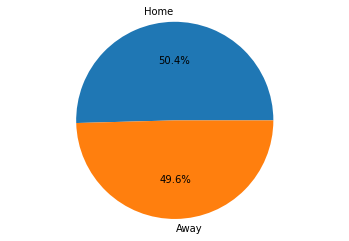

In [26]:
indep_home_wins=indep_no_draws_matches['winning team'][indep_no_draws_matches['winning team']=='H'].count()
indep_away_wins=indep_no_draws_matches['winning team'][indep_no_draws_matches['winning team']=='A'].count()
indep_total_wins=indep_no_draws_matches['winning team'].count()

#Plotting the chart
plt.clf()
plt.pie([indep_home_wins,indep_away_wins],labels=['Home','Away'],autopct='%0.1f%%')
plt.axis('equal')
plt.show()

Now it doesn't seem at all that there are significant difference. We'll find it out with **binomial test**:

In [27]:
#Doing the test
p_val_test3=binom_test(indep_home_wins,indep_total_wins,0.5,alternative='greater')

print(f'P-value equals to {p_val_test3}')

#printing the test result
if p_val_test3 <= alpha:
    print('Null hypothesis can be rejected')
else:
    print('Null hypothesis cannot be rejected')

P-value equals to 0.4738363648026928
Null hypothesis cannot be rejected


So according to this test, we are definitely **can't reject the null hypothesis**, therefore hosting doesn't seem to effect the home team probability to win.

**Audience quantity superiority test-**
<br>
Given again that a match ended with one of the teams win, the **null hypothesis** of the fourth test is that audience quantity superiority for one team doesn't effect this team probability to win, so the probability remains 50% (p=0.5). On the other hand, the **alternative hypothesis** of the fourth test is that audience quantity superiority **increases** this team probability to win so it's over 50% (p>0.5).
<br>
Likewise, I'll define for this test **significance threshold of 5%**.
<br>
**Note:** for this test, we'll regard to the new definition winning team.

We'll take a look at the new data frame new defined wins distribution:

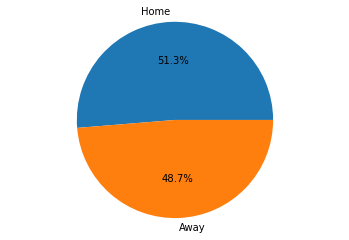

In [28]:
indep_updated_home_wins=indep_no_draws_matches['new definition winning team'][indep_no_draws_matches['new definition winning team']=='Home'].count()
indep_updated_away_wins=indep_no_draws_matches['new definition winning team'][indep_no_draws_matches['new definition winning team']=='Away'].count()

#Plotting the chart
plt.clf()
plt.pie([indep_updated_home_wins,indep_updated_away_wins],labels=['Home','Away'],autopct='%0.1f%%')
plt.axis('equal')
plt.show()

We have little more difference but it still doesn't seem significant. We'll find it out with **binomial test**:

In [29]:
#Doing the test
p_val_test4=binom_test(indep_updated_home_wins,indep_total_wins,0.5,alternative='greater')

print(f'P-value equals to {p_val_test4}')

#printing the test result
if p_val_test4 <= alpha:
    print('Null hypothesis can be rejected')
else:
    print('Null hypothesis cannot be rejected')

P-value equals to 0.3713952910505279
Null hypothesis cannot be rejected


So according to this test, we are definitely **can't reject the null hypothesis**, therefore audience quantity superiority doesn't seem to effect the team probability to win.

**Comparing the two tests results-**
<br>
Both tests result hadn't rejected their null hypothesis. If we look at the tests p-values, we can see that the fourth test has smaller p-value (0.37) than the third test (0.47), meaning it was closer to reject its null hypothesis. It might indicate that the audience quantity superiority has more effect on the team probability to win then just hosting, but yet both p-values are far bigger than the significance threshold, so even if there is difference between them, it will be hardly expressed in reality, because **both factors doesn't concretely effect the matches results**.

<br>

### 3. Conclusions

In this project, I've differentiated the factors of match hosting and quantity superiority of one of the teams audience, and statistically tested the effect of each one of them on the matches final results, and then compared the differences between them, expecting that the second one is more effective factor than the first. For this purpose I've collected data from the Israeli major football league, which is a good example of a league where the hosting team isn't necessarily the one with audience quantity superiority.
<br>
Afterward I've defined criteria for what is significant audience quantity superiority (according to quantities ratio thresholds) and have tidied the data so I've left with data includes matches that ended with one of the teams win (i.e no draws) and had an audience quantity superiority to the home team or the away team.
<br>
In the **first comparison** I've assumed that all data matches are independent (both teams have the same probability to win) with a lack of the hosting or audience quantity superiority factors, predefined a significance threshold, and then I've statistically tested if each of the factors presence had biased the probability to win in favor of the host and the team with audience quantity superiority respectively. Both tests showed probability bias as expected- the first test showed that home team has better chance to win the match than the away team, and the second test showed that team with audience quantity superiority has better chance to win the match than the other team, but the second test result was much more significant than the first test result, so, according to the first comparison, audience quantity superiority seems more effective on the match result than hosting, as expected.
<br>
But in reality, the independency assumption of the first comparison isn't true. By this assumption, I've ignored a very important factor- the quality difference between teams. In many matches there is one team that is more quality than the other and therefore has better chance to win. Moreover, there may be a positive correlation between team quality and its audience quantity, and this optional correlation may have effected the first comparison results. Therefore, in the **second comparison** I've defined criterion for what is significant quality difference between teams according to their ranking in the league season final table. After tidying, I've left with data includes matches without significant quality difference, and for this data I've assumed that all matches are independent with a lack of the hosting or audience quantity superiority factors, and then repeated both tests of the first comparison. In these tests, even though the audience quantity superiority test showed better result then the hosting test result, both results were far from showing any effection of the tested factors on the matches results. Therefore, I can't say that my expectation was fulfilled.

<br>

### 4. Next steps

The project research can be expanded. Here are some methods that may reinforce the results:
<br>
* Continuing to collect the matches data over the next football seasons.
<br>
* Calculating the correlation between team quality and team audience quantities in matches and with this correlation trying to find a better criteria for independency.
<br>
* Defining quality differences and significant quality difference by league points differences instead of ranking differences.
<br>
* Reference to another factors that may effect a match result independency, for example if several influential players can't play for one team, or if a player of one team sent off early, these factors increase the other team chance to win the match.